In [49]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

####################################################################################
city_len = 1860
ex_flg = False
####################################################################################

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
pop_path = f'{h08dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
riv_path = f'{h08dir}/wsi/dat/riv_out_/W5E5LR__00000000.gl5'
rivnum_path = f'{h08dir}/global_city/dat/riv_num_/rivnum.CAMA.gl5'
rivara_path = f'{h08dir}/global_city/dat/riv_ara_/rivara.CAMA.gl5'
rivnxl_path = f"{h08dir}/global_city/dat/riv_nxl_/rivnxl.CAMA.gl5"
msk_dir = f'{h08dir}/global_city/dat/vld_cty_'
cnt_dir = f'{h08dir}/global_city/dat/cty_cnt_/gpw4'
prf_dir = f'{h08dir}/global_city/dat/cty_prf_'

rivnxl_gl5 = np.fromfile(rivnxl_path, 'float32').reshape(2160, 4320)
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
rivout = np.fromfile(riv_path, dtype='float32').reshape(2160, 4320)
rivnum_gl5 = np.fromfile(rivnum_path, dtype='float32').reshape(2160, 4320)
rivara = np.fromfile(rivara_path, dtype='float32').reshape(2160, 4320)

lonlat_path = f'{h08dir}/global_city/dat/cty_lst_/gpw4/WUP2018_300k_2010.txt'
with open(lonlat_path, "r") as input_file:
    lines = input_file.readlines()

# identifying same rivnum cities into list?
city_basins = {}
for i in range(city_len):
    city_num = i+1
    ctymsk_path = f'{msk_dir}/city_{city_num:08}.gl5'
    prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'

    if not os.path.exists(prf_path):
        print(f'{city_num} is invalid prf')

    else:
        ctymsk = np.fromfile(ctymsk_path, dtype='float32').reshape(2160, 4320)
        prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
        rivnum_mask = np.ma.masked_where(prf == 0, rivnum_gl5)
        rivnum_lst = np.unique(rivnum_mask)[:-1]
        city_basins[city_num] = rivnum_lst.filled(1e20)
        
        #largest_rivnum = np.min(rivnum_mask)
        #mask = (rivnum == largest_rivnum)
        #print('rivnum', city_num, largetst_rivnum)
        print(f'{city_num} done')

print(city_basins)

1 done
2 done


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f26d03b32b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 

KeyboardInterrupt



In [46]:
"""
basin_to_cities = {}
for city, basins in city_basins.items():
    for rivnum in basins:
        if rivnum not in basin_to_cities:
            basin_to_cities[rivnum] = []
        basin_to_cities[rivnum].append(city)

# 集計結果を出力
for rivnum, cities in basin_to_cities.items():
    if len(cities) > 1:  # 複数の都市に共有されている流域番号のみ表示
        print(f"rivnum {rivnum}: {cities}")

import json
city_basins_list = {city: basins.tolist() for city, basins in city_basins.items()}
cityrivnum = f'{h08dir}/global_city/dat/riv_num_/city_basins.json'
with open(cityrivnum, 'w') as json_file:
    json.dump(city_basins_list, json_file)
print(f'{cityrivnum} saved')
"""

'\nbasin_to_cities = {}\nfor city, basins in city_basins.items():\n    for rivnum in basins:\n        if rivnum not in basin_to_cities:\n            basin_to_cities[rivnum] = []\n        basin_to_cities[rivnum].append(city)\n\n# 集計結果を出力\nfor rivnum, cities in basin_to_cities.items():\n    if len(cities) > 1:  # 複数の都市に共有されている流域番号のみ表示\n        print(f"rivnum {rivnum}: {cities}")\n\n# この結果をsaveして，それぞれの都市で再計算するのが計算効率がいい気がする．\n\nimport json\ncity_basins_list = {city: basins.tolist() for city, basins in city_basins.items()}\ncityrivnum = f\'{h08dir}/global_city/dat/riv_num_/city_basins.json\'\nwith open(cityrivnum, \'w\') as json_file:\n    json.dump(city_basins_list, json_file)\nprint(f\'{cityrivnum} saved\')\n'

In [50]:
cityrivnum = f'{h08dir}/global_city/dat/riv_num_/city_basins.json'
with open(cityrivnum, 'r') as json_file:
    city_basins = json.load(json_file)

print(len(city_basins.keys()))

1553


In [43]:
basin_to_cities = {}
for city, basins in city_basins.items():
    for rivnum in basins:
        if rivnum not in basin_to_cities:
            basin_to_cities[rivnum] = []
        basin_to_cities[rivnum].append(city)

"""
for rivnum, cities in basin_to_cities.items():
    if len(cities) > 1:  # 複数の都市に共有されている流域番号のみ表示
        print(f"rivnum {rivnum}: {cities}")
"""
keys_list = list(basin_to_cities.keys())
target_num = keys_list[0]
print(target_num)
rivnum_list = basin_to_cities[target_num]
rivnum_list = [int(i) for i in rivnum_list]
print(rivnum_list)

848.0
[1, 936, 1283, 1400]


In [ ]:
#overlapしている都市は省く処理
overlap_path = f'{h08dir}/global_city/dat/cty_lst_/gpw4/citymask_overlap.txt'
with open(overlap_path, "r") as f:
    overlap = f.readlines()
for i in overlap:
    i.

In [51]:
def l_coordinate_to_tuple(lcoordinate, a=2160, b=4320):
    lat_l = ((lcoordinate - 1) // b)
    lon_l = (lcoordinate) % b - 1
    return (lat_l, lon_l)

def nxtl2nxtxy(rgnfile, upperindex, leftindex):
    vfunc = np.vectorize(l_coordinate_to_tuple, otypes=[tuple])
    riv_nxtxy = np.empty(rgnfile.shape, dtype=tuple)
    mask = ~np.isnan(rgnfile)
    riv_nxtxy[mask] = vfunc(rgnfile[mask])
    riv_nxtxy_shape = (riv_nxtxy.shape[0], riv_nxtxy.shape[1], 2)
    
    riv_nxtxy_lst = []
    for row in riv_nxtxy:
        for y, x in row:
            modified_y = y - upperindex
            modified_x = x - leftindex
            riv_nxtxy_lst.append((modified_y, modified_x))

    riv_nxtxy_cropped = np.array(riv_nxtxy_lst).reshape(riv_nxtxy_shape)
    riv_nxtxy_cropped = riv_nxtxy_cropped.astype(int)
    return riv_nxtxy_cropped
    
def lonlat2xy(loncnt, latcnt, a=2160, b=4320):
    if -180 <= loncnt <=180:
        lon_middle = int(((loncnt+180)/360)*b )
        lat_middle = int(((90-latcnt)/180)*a ) 
    else:
        lon_middle = 1e20
        lat_middle = 1e20
    return lon_middle, lat_middle
    
riv_nxlonlat_cropped = nxtl2nxtxy(rivnxl_gl5, 0, 0)
riv_nxlonlat_cropped[0].shape

In [71]:
keys_list = list(basin_to_cities.keys())
uid = keys_list[0]
rivnum_list = basin_to_cities[uid]
rivnum_list = [int(i) for i in rivnum_list]

coords_a = []
for city_num in rivnum_list:
    prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
    prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
    prf_coord = np.where((prf == 1) & (rivnum_gl5 == uid))
    coords_a.append(prf_coord)
    
print(coords_a)
print(coords_a[0])
print(coords_a[0][0])
print(coords_a[0][1])
    
target_coord = tuple(coords_a[0]) 
next_coord = riv_nxlonlat_cropped[target_coord[0], target_coord[1]][0]
print(next_coord)
print(next_coord[0])
print(next_coord[1])

[(array([646]), array([3836])), (array([639]), array([3838])), (array([644]), array([3829])), (array([644]), array([3829]))]
(array([646]), array([3836]))
[646]
[3836]
[ 646 3837]
646
3837


In [81]:
visited_coords = set()
riv_path_array = np.zeros((2160, 4320))
riv_path_array[coords_a[0][0][0], coords_a[0][1][0]] = uid

if len(coords_a) > 0:
    target_coord = (coords_a[0][0][0], coords_a[0][1][0])
    
    while True:
        if target_coord in visited_coords:
            break
        visited_coords.add(target_coord)
        
        # next_coord を直接タプルに変換
        next_coord = riv_nxlonlat_cropped[target_coord[0], target_coord[1]]
        if next_coord.size == 0 or next_coord.shape != (2,):
            break
        
        next_coord = (next_coord[0], next_coord[1])
        riv_path_array[next_coord[0], next_coord[1]] = uid
        target_coord = next_coord

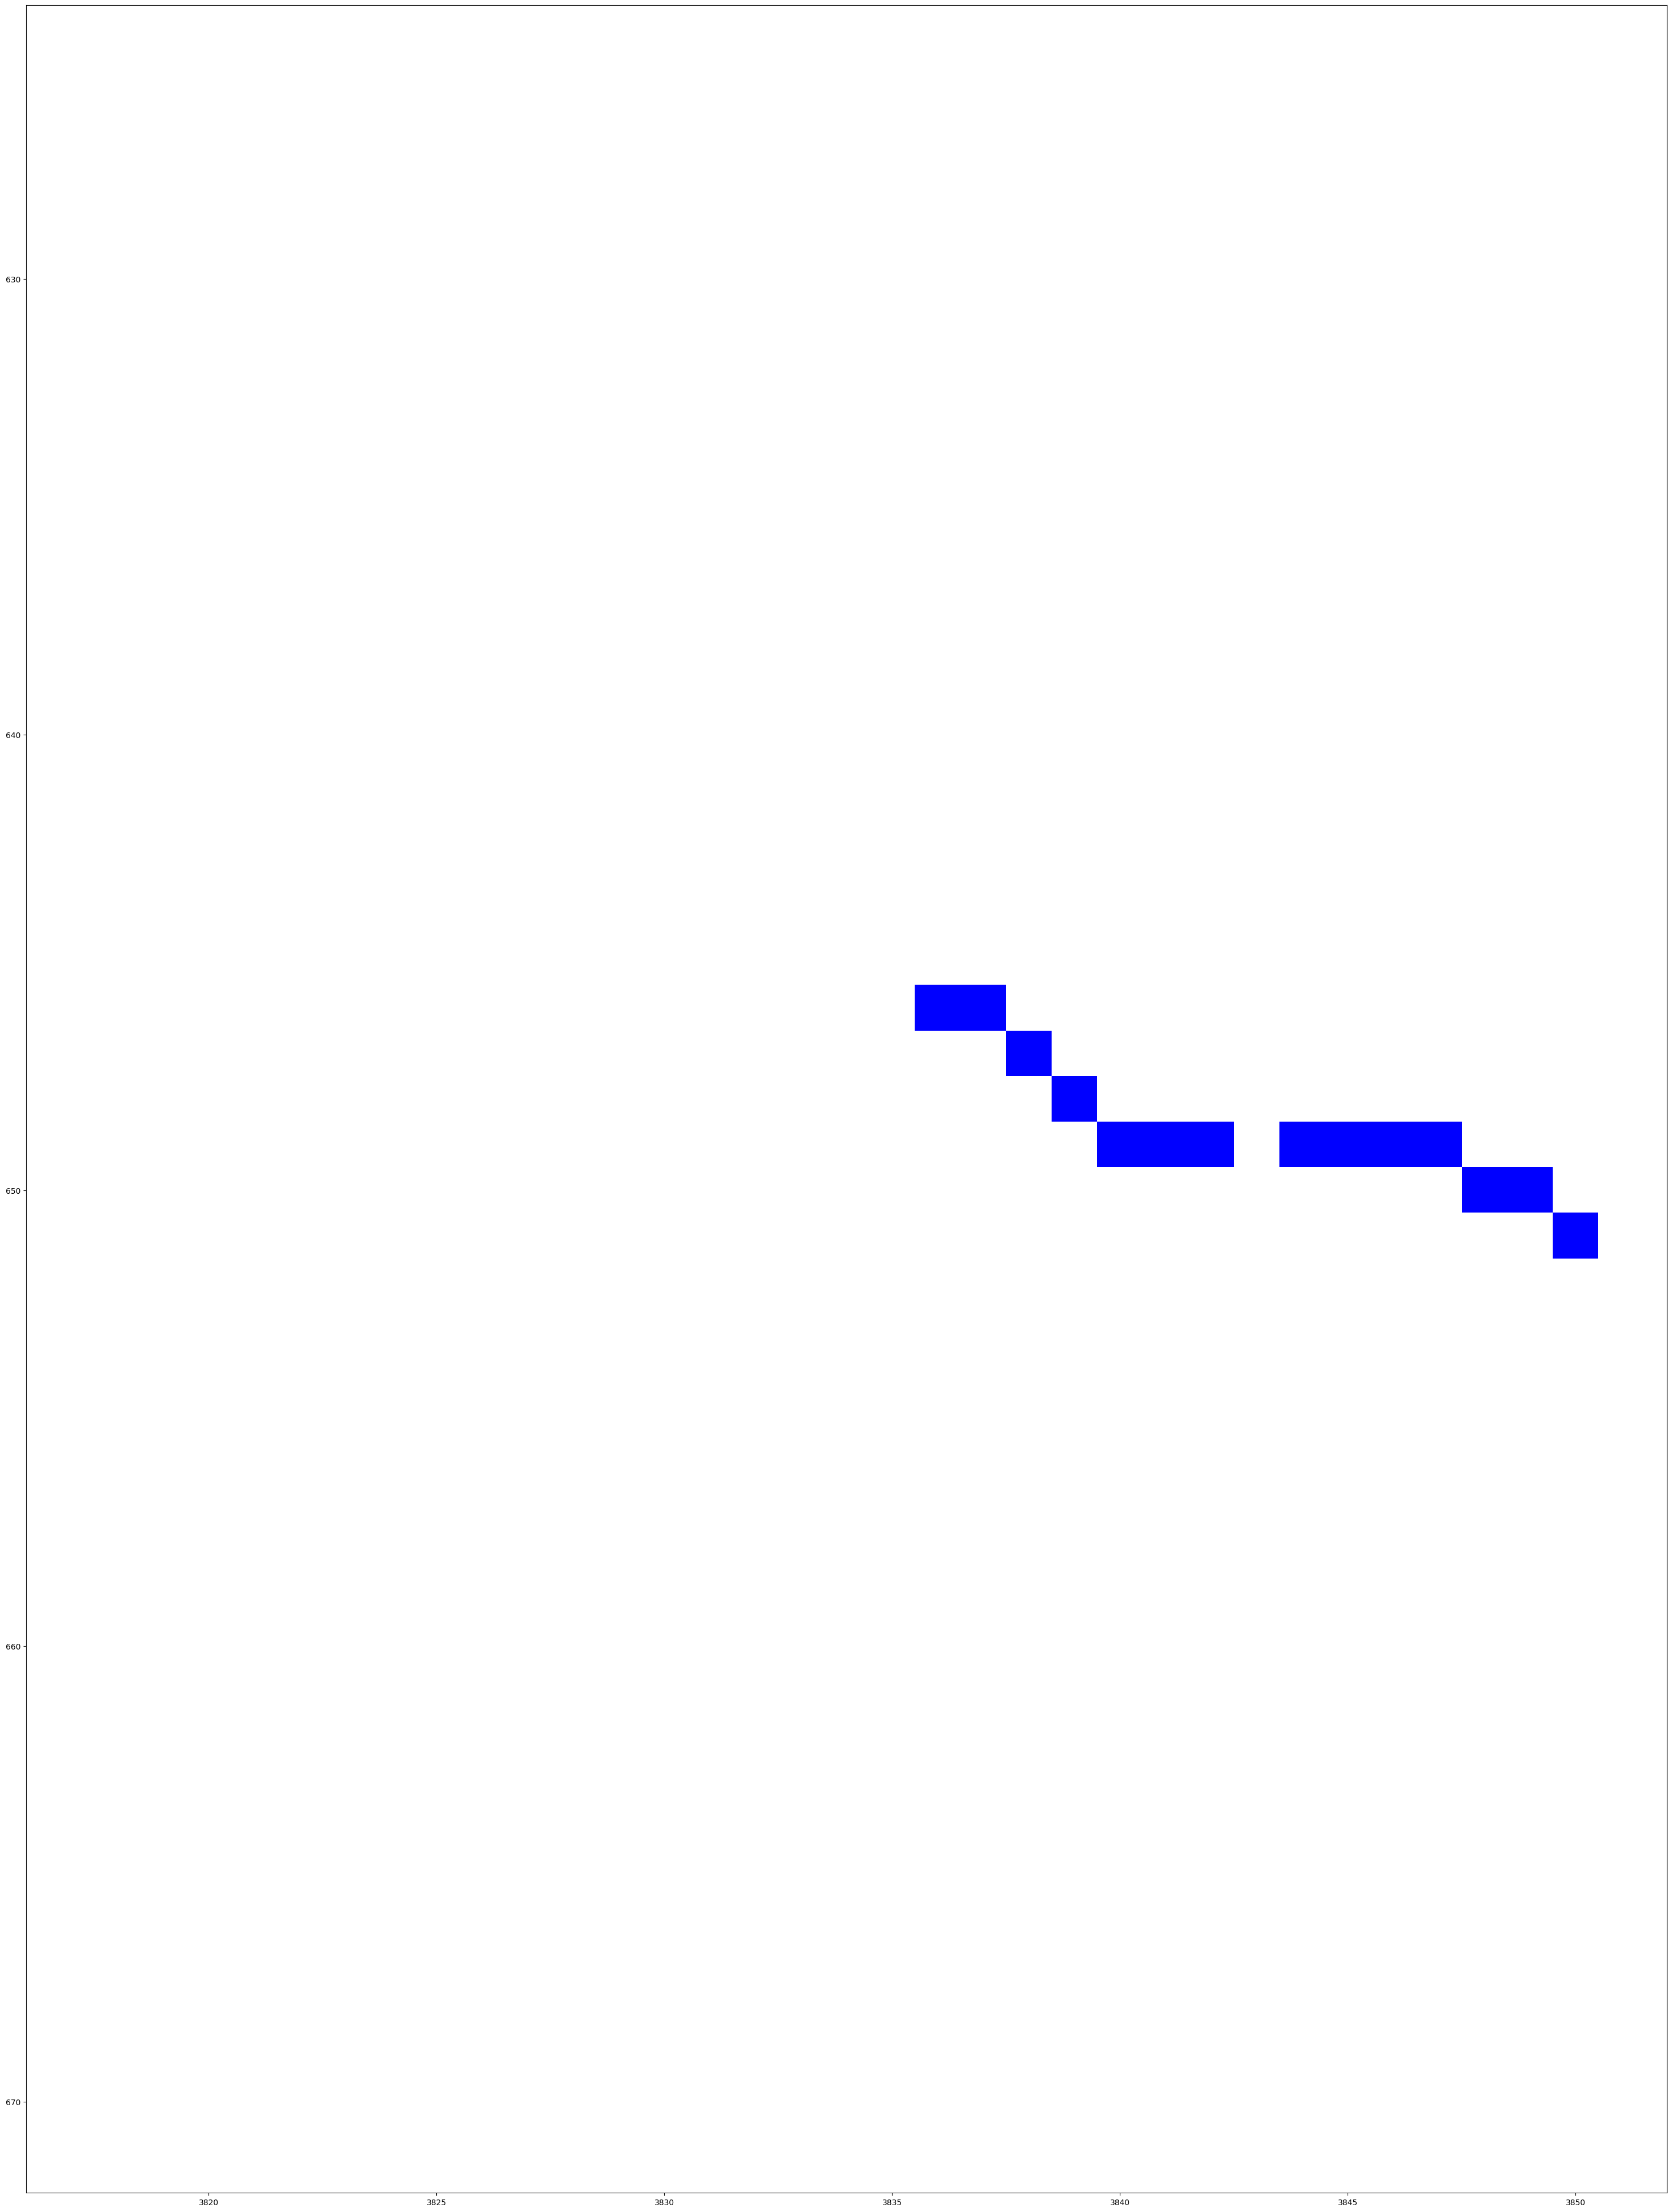

In [95]:
from matplotlib.colors import LinearSegmentedColormap

left = 138
right = 141
bottom = 34
top = 38
#
resolution=12
nx, ny = (right - left)*resolution, (top - bottom)*resolution
rgnshape = (ny, nx)
img_extent = (left, right, bottom, top)
#
upperindex = (90-top)*resolution
lowerindex = (90-bottom)*resolution
leftindex = (180+left)*resolution
rightindex = (180+right)*resolution
#
tmp = np.ma.masked_where(riv_path_array == 0, riv_path_array)
fig, ax = plt.subplots(figsize=(50,50))
blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', ['#0000FF', '#ADD8E6'])
im = ax.imshow(tmp, cmap=blue_cmap)
row_min, row_max = upperindex, lowerindex
col_min, col_max = leftindex, rightindex
ax.set_xlim(col_min, col_max)
ax.set_ylim(row_max, row_min)  # y方向は逆なので注意

plt.show()